# HSE 2019 ML (bachelors 3rd course)
## Homework #2
### Student: Igor Tukh

### VC-theory

#### 1) (2 points) Identify breakpoints, VC-dimensions and growth functions of following hypotheses:

#### a) $$h(x) = +1\;\textrm{if}\;x_i > a$$
#### b) $$h(x) = +1\;\textrm{if}\;b > x_i > a$$

#### Solution:

$$m_{H}(N) = \max |H(\textbf{x}_{1}, \dots, \textbf{x}_{2})|$$

$$d_{vc}(H) = \max\{N\;|\;m_{H}(N) = 2^{N}\}$$

$$\textrm{breakpoint} = \min\{k\;|\;m_{H}(k) < 2^{k}\} = d_{vc}(H) + 1$$

Here and further $x_k$ is a designation for $x_{k, i}$, where the index i is from the statement and $x_{k, i}$ is a value of the ith feature of kth point.

$\textbf{a)}$

In this case, breakpoint is obviously 2. Let's prove it:

Let's assume $k = 1 \Rightarrow$ there are two cases $h(x_0) = -1$ and $h(x_0) = +1$ and both of them are possible

Let's assume $k = 2$ and we have two points: $x_0 < x_1$ (if $x_0 = x_1, h(x_0) \ne h(x_1)$ cases aren't possible)

In this case $h(x_0) = +1 \Rightarrow h(x_1) = +1$, so $h(x_1) = -1, h(x_0) = +1$ isn't possible case. So breakpoint is 2.

So $d_{vc} = 2 - 1 = 1$ 

$m_{H}(N) = N + 1$. Let's prove.

Let's assume we have $x_0 \leq x_1 \leq \dots \leq x_{N - 1}$. Possible dichotomies should have the following form (and all such forms are possible):

\begin{equation}
    \begin{cases}
        h(x_i) = +1, i \geq k \\
        h(x_i) = -1, \;\textrm{otherwise}\; \\
    \end{cases}
    \;\textrm{for all}\;0 \leq k \leq N
\end{equation}

Amount of such dichotomies is exactly $N + 1$

$\textbf{b)}$

In this case, breakpoint is obviously 3. Let's prove it:

Let's notice that for $k = 1$ and $k = 2 (x_0 < x_1)$ all the dichotomies are possible.

In the case $k = 3$ and $x_0 \leq x_1 \leq x_2$ case $h(x_0) = +1, h(x_1) = -1, h(x_2) = +1$ isn't possible, so $k = 3$ is a breakpoint.

$d_{vc} = 3 - 1 = 2$

Let's assume we have $x_0 \leq x_1 \leq \dots \leq x_{N}$

Lets prove lemma: the dichotomy is possible if and only if there are no three indexes $i < j < k: h(x_{i}) = h(x_{k}) = +1, h(x_j) = -1$ and there are no such index $k: x_{k} = x_{k + 1}$ and $h(x_k) \ne h(x_{k + 1})$

If there are no such indexes, we can chose $a = x_{i} - \varepsilon, b = x_{j} + \varepsilon$, where $x_{i}$ is the lowest point: $x_{k} = +1$ and $x_j$ is the greatest such index and $\varepsilon < \min(x_{i} - x_{i - 1}, x_{j + 1} - x_{j})$ (if $i = 0$ or $j = N - 1$, appropriate value is $10^{-9}$). If there are no such index $k : x_{k} = +1$, $a = b = x_{0} - 1$. Anyway, it is correct dichotomy for such h values.

If such indexes exist, it is an obviously incorrect dichotomy.

Now let's assume that there are no equal $x_i$. How much of dichotomies satisfy the lemma? As we just have understood, $\{i: x_i = +1\}$ is a continuous subrange of $[0; N - 1]$ or doesn't exist. So it is $1 + \sum\limits_{l = 0}^{N - 1} (N - l) = 1 + \frac{N \cdot (N + 1)}{2}$

If some of $x_i$ are equal, amount of the correct dichotomies is obviously less.

So $m_{H}(N) = \frac{N \cdot (N + 1)}{2} + 1$ (and breakpoint calculated above satisfy it).

### Perceptron

#### Dataset: blobs2.csv.
#### 2) (4 points) Implement the pocket perceptron algorithm. Train-test split the dataset (80%/20%). Train the algorithm on train points and find the best performing line on test points. Find the best percept Draw dataset points and the resulting line.

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [290]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import PolynomialFeatures
from tqdm import tqdm_notebook as tqdm
from sklearn.preprocessing import MinMaxScaler

In [73]:
np.random.seed(23923)

In [74]:
DATASETS_DIR = 'datasets'

In [206]:
def load_csv_dataset(dataset_name, label_name='label'):
    dataset_path = os.path.join(DATASETS_DIR, dataset_name)
    if label_name is not None:
        dataset = pd.read_csv(dataset_path)
        data_columns = np.array([name for name in dataset.columns if name != label_name])
        return dataset[data_columns], dataset[np.array([label_name])]
    else:
        return pd.read_csv(dataset_path)

In [398]:
def predict(w, x):
    return 1 if np.dot(w, x) > 0 else -1

def pocket_algorithm(points, correct_values, test_points, test_values, iterations_amount, metrics):
    best_metrics = 0
    best_w = 0
    w = np.random.normal(0, 1, points.shape[1])
    for _ in tqdm(range(iterations_amount + 1)):
        predicted_values = np.array([predict(w, point) for point in test_points])
        current_metrics = metrics(test_values, predicted_values.reshape(-1))
        if current_metrics > best_metrics:
            best_metrics = current_metrics
            best_w = w
        predicted_values = np.array([predict(w, point) for point in points])
        incorrect_indexes = np.where(predicted_values != correct_values)[0]
        if incorrect_indexes.shape[0] == 0:
            break
        w += correct_values[incorrect_indexes[0]] * points[incorrect_indexes[0]]
    
    return best_w

Now let's plot the results. Function for visualization will be based on [this](https://stats.stackexchange.com/a/71339) visualization

In [401]:
def build_plot_pocket(X, y, iterations_amount, degree=1, plot_title='Pocket algorithm', metrics=f1_score):
    labels = y['label'].unique()
    labels_map = {labels[0]: -1, labels[1]: 1}
    y = y['label'].apply(lambda label: labels_map[label])
    y = y.to_numpy().reshape(-1)
    poly = PolynomialFeatures(degree=degree)
    X = poly.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23923)
    w = pocket_algorithm(X_train, y_train, X_test, y_test, iterations_amount, metrics)
    clf = lambda x: predict(w, x)
    train_score = f1_score(y_train, np.array([clf(x) for x in X_train]))
    test_score = f1_score(y_test, np.array([clf(x) for x in X_test]))
    
    h = .02
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    fig, ax = plt.subplots()
    Z = np.array([clf(poly.transform(np.array([point])).reshape(-1)) for point in np.c_[xx.ravel(), yy.ravel()]])

    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.scatter(X[:, 1].reshape(-1), 
               X[:, 2].reshape(-1), 
               c=y.reshape(-1), cmap=plt.cm.coolwarm,
               s=20, 
               edgecolors='k')
    ax.set_title('{}, train f1 score = {}, test f1 score {}'.format(plot_title, train_score, test_score))
    
    plt.show()

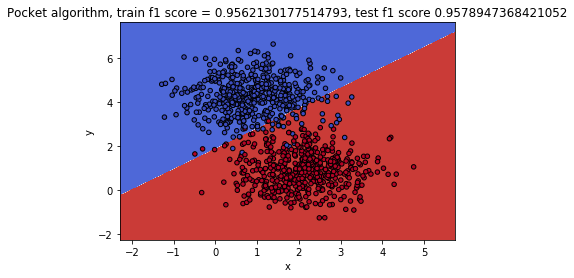

In [402]:
def second_task():
    points, values = load_csv_dataset('blobs2.csv')
    build_plot_pocket(points, values, iterations_amount=100)

second_task()

##### 3) (4 points) Add second-degree polynomial features to the dataset (x_1^2, x_2^2, x_1x_2), find the best perceptron hyperplane. Draw a projection of the hyperplane to the original two-dimensional space. Repeat for third- and fourth-degree polynomial features.

/Users/itukh/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


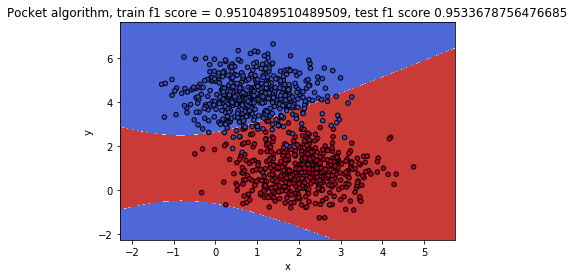

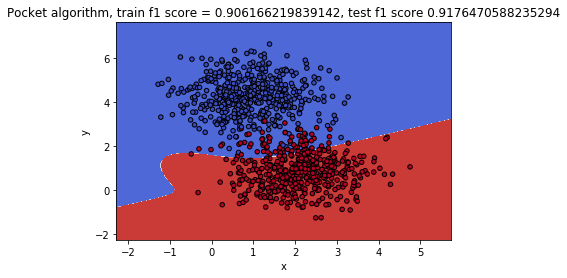

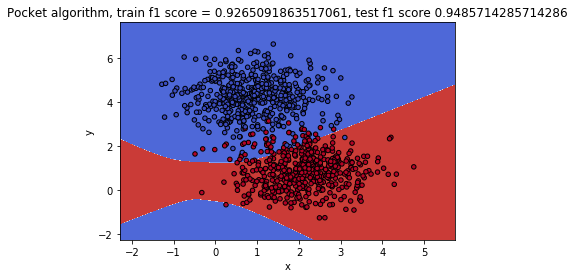

In [403]:
def third_task():
    points, values = load_csv_dataset('blobs2.csv')
    build_plot_pocket(points, values, iterations_amount=100, degree=2)
    build_plot_pocket(points, values, iterations_amount=100, degree=3)
    build_plot_pocket(points, values, iterations_amount=100, degree=4)

third_task()

### Logistic regression

#### Datasets: cancer.csv, spam.csv.

##### 4) (4 points) Implement the logistic regression algorithm. Train it via the stochastic gradient descent and output draw the accuracy/iteration curve.

In [387]:
def get_sigmoid(s):
    if s < 0:
        return 1 - get_sigmoid(-s)
    return 1.0 / (1.0 + np.exp(-s))

def get_prediction(w, x):
    return -1 if get_sigmoid(np.dot(w, x)) < 0.5 else 1

def get_accuracies(w, points, values):
    predicted_values = np.array([get_prediction(w, x) for x in points])
    return np.mean(np.array(predicted_values == values, dtype=int))

def logistic_regression_algorithm(points, values, iterations_amount, batches_amount, eta):
    batch_size = (points.shape[0] + batches_amount - 1) // batches_amount
    w = np.random.normal(0, 1, points.shape[1])
    
    accuracies = [get_accuracies(w, points, values)]
    for _ in tqdm(range(iterations_amount)):
        for batch_ind in range(batches_amount):
            batch_first_ind = batch_size * batch_ind
            batch_last_ind = batch_size * (batch_ind + 1) if batch_ind != batches_amount - 1 else points.shape[0]
            cur_batch_size = batch_last_ind - batch_first_ind
            delta_w = 0
            for point_ind in range(batch_first_ind, batch_last_ind):
                delta_w += (1.0 * values[point_ind] * points[point_ind]) / (
                    1.0 + np.exp(values[point_ind] * np.dot(w, points[point_ind])))
            w += eta * delta_w / cur_batch_size
        accuracies.append(get_accuracies(w, points, values))
    
    return accuracies

In [390]:
def build_plot_logistic_regression(points, values, iterations_amount, batches_amount, dataset_name, eta=0.2):
    PolynomialFeatures(degree=1).fit_transform(points)
    labels = values['label'].unique()
    labels_map = {labels[0]: -1, labels[1]: 1}
    values = values['label'].apply(lambda label: labels_map[label])
    values = values.to_numpy().reshape(-1)
    points = points.to_numpy()
    points = MinMaxScaler().fit_transform(points)
    
    accuracies = logistic_regression_algorithm(points, values, iterations_amount, batches_amount, eta)
    plt.clf()
    plt.title('Accuracy / Iteration number curve for dataset {}'.format(dataset_name))
    plt.xlabel('Iteration number')
    plt.ylabel('Accuracy')
    plt.plot(list(range(len(accuracies))), accuracies)
    plt.show()

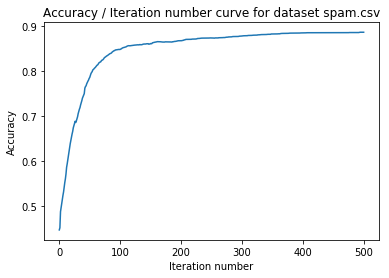

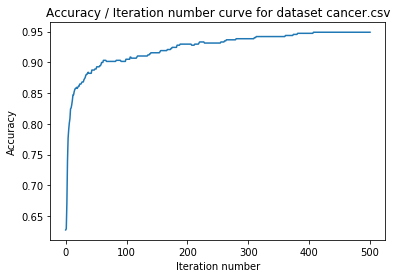

In [391]:
def fourth_task():
    points, values = load_csv_dataset('spam.csv')
    build_plot_logistic_regression(points, values, 500, 25, 'spam.csv')
    points, values = load_csv_dataset('cancer.csv')
    build_plot_logistic_regression(points, values, 500, 25, 'cancer.csv')

fourth_task()

### Neural networks

#### Datasets: mnist.csv, notMNIST.tar.gz

#### 5) (2 points) Prepare the datasets so that every point is represented by a two-dimensional tensor.